# Data Cleaning

## Import Libraries

In [80]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numerize import numerize
import geopandas as gpd

## Import Dataframe

In [120]:
# Import dataframe
kp = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_provinsi.csv')
k_mk = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_modal_kerja_bank.csv')
k_i = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_investasi_bank.csv')
k_k = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_konsumsi_bank.csv')
pdrb = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/pdrb.csv')

## Check Missing Value

In [44]:
print(kp.isna().sum())
print(k_mk.isna().sum())
print(k_i.isna().sum())
print(k_k.isna().sum())
print(pdrb.isna().sum())

no          0
provinsi    0
tahun       0
kredit      0
dtype: int64
bank      0
tahun     0
kredit    0
dtype: int64
bank      0
tahun     0
kredit    0
dtype: int64
bank      0
tahun     0
kredit    0
dtype: int64
no            0
provinsi      0
tahun_2011    1
tahun_2012    1
tahun_2013    0
tahun_2014    0
tahun_2015    0
tahun_2016    0
tahun_2017    0
tahun_2018    0
tahun_2019    0
tahun_2020    0
tahun_2021    0
tahun_2022    0
dtype: int64


## Detect Missing Value Location

In [45]:
col_pdrb = pdrb.columns.values.tolist()
for i in range(len(col_pdrb)):
    if pdrb[col_pdrb[i]].isna().sum() == 1:
        for j in range(pdrb.shape[0]):
            if pdrb[col_pdrb[i]].isna().loc[j]:
                print(f"Data hilang:\n[tahun,provinsi]: {[col_pdrb[i],pdrb['provinsi'].loc[j]]}")

Data hilang:
[tahun,provinsi]: ['tahun_2011', 'Kalimantan Utara']
Data hilang:
[tahun,provinsi]: ['tahun_2012', 'Kalimantan Utara']


## Impute Missing Value

In [123]:
pdrb.loc[33, 'tahun_2011'], pdrb.loc[33, 'tahun_2012'] = 0, 0

# Data Exploration and Visualization

In [47]:
# Lookup dataframe
print(kp.head())
print(pdrb.head())
print(k_k.head())
print(k_i.head())
print(k_mk.head())

   no        provinsi  tahun     kredit
0   1            Aceh   2002   1568.500
1   2  Sumatera Utara   2002  10058.580
2   3  Sumatera Barat   2002   3747.333
3   4            Riau   2002   8048.167
4   5           Jambi   2002   2581.833
   no        provinsi  tahun_2011  tahun_2012  tahun_2013  tahun_2014  \
0   1            Aceh    22704.80    23099.13    23228.59    23129.04   
1   2  Sumatera Utara    26711.24    28036.88    29339.21    30477.07   
2   3  Sumatera Barat    22638.75    23744.01    24857.64    25982.83   
3   4            Riau    71637.89    72396.34    72297.05    72390.88   
4   5           Jambi    30856.66    32417.72    34012.10    35878.09   

   tahun_2015  tahun_2016  tahun_2017  tahun_2018  tahun_2019  tahun_2020  \
0    22524.31    22835.29    23362.90    24013.79    24842.30    25018.28   
1    31637.41    32885.09    34183.58    35570.50    36853.59    36175.16   
2    27080.76    28164.93    29312.17    30470.80    31427.29    30696.21   
3    70769.78

## Visualisasi data kredit menurut provinsi

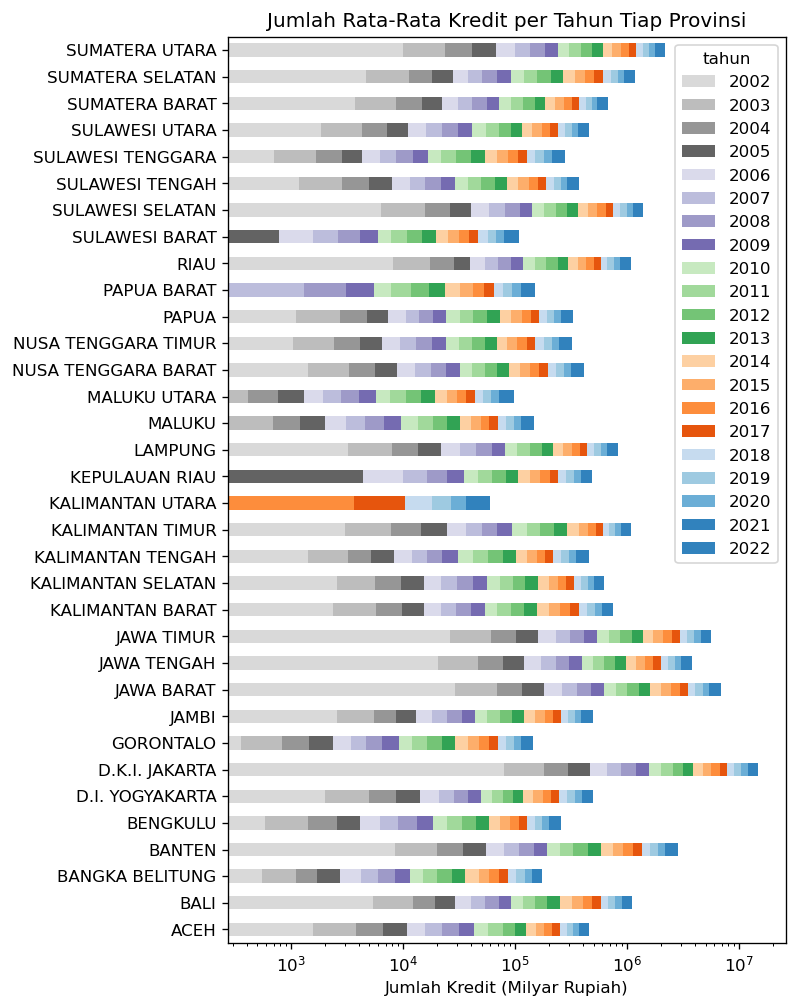

In [88]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 6, 10

kp_pivot = kp.pivot(index='provinsi', columns='tahun', values='kredit').reset_index()

kp_pivot.plot(
    x='provinsi',
    kind='barh',
    stacked=True,
    colormap='tab20c_r'
)

plt.title('Jumlah Rata-Rata Kredit per Tahun Tiap Provinsi')
plt.xlabel('Jumlah Kredit (Milyar Rupiah)')
plt.ylabel('')
plt.xscale('log')
plt.show()

## Visualisasi Hubungan Kredit dan PDRB

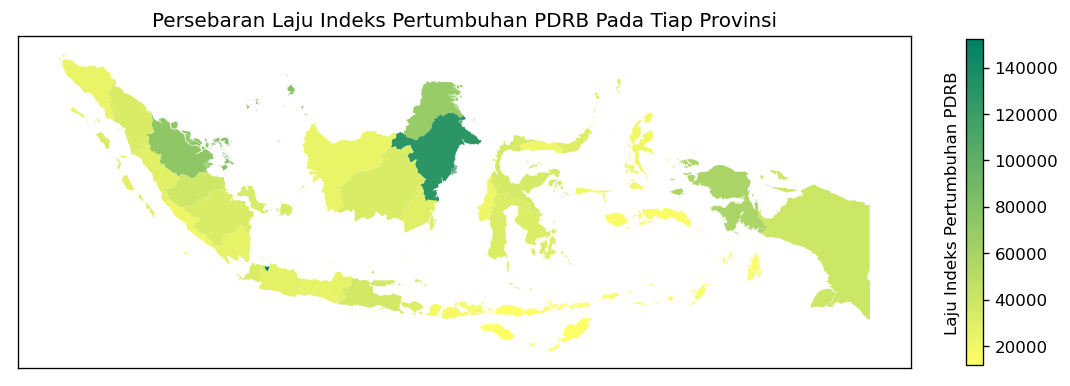

In [109]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 12, 6

dg = gpd.read_file('https://github.com/Fery-K/Capstone_Project_TETRIS/raw/master/Provinsi%20Shapefiles/Batas%20Provinsi.shp')
pdrb['provinsi'] = pdrb['provinsi'].str.upper()    
dg['Provinsi'] = dg['Provinsi'].replace(['KEPULAUAN BANGKA BELITUNG', 'DKI JAKARTA', 'DAERAH ISTIMEWA YOGYAKARTA'],
                                       ['BANGKA BELITUNG', 'D.K.I. JAKARTA', 'D.I. YOGYAKARTA'])

dg_pdrb = pd.merge(dg, pdrb, left_on='Provinsi', right_on='provinsi')

# dg_pdrb.plot(column=kolom_tahun, cmap='summer_r', legend=True, legend_kwds={'shrink': 0.6})
dg_pdrb['agg'] = dg_pdrb.loc[:, 2011:2022].mean(axis=1)
dg_pdrb.plot(column='agg', cmap='summer_r', legend=True, legend_kwds={'shrink': 0.6})
plt.title('Persebaran Laju Indeks Pertumbuhan PDRB Pada Tiap Provinsi')
plt.xticks([])
plt.yticks([])
plt.ylabel('Laju Indeks Pertumbuhan PDRB', labelpad=-565)
plt.show()

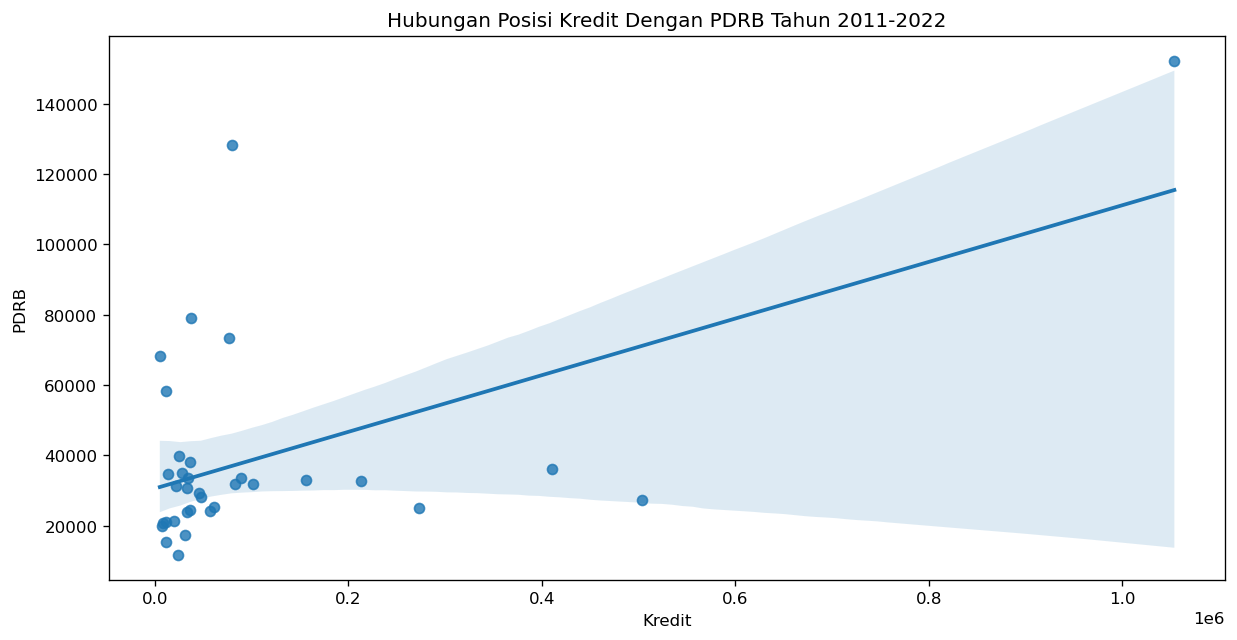

In [117]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 12, 6

pdrb.columns = ['no', 'provinsi'] + [(2011+i) for i in range(12)]

pdrb_ver = pd.melt(pdrb, id_vars=['no', 'provinsi'], 
                   value_vars=[(2011+i) for i in range(12)],
                   var_name = 'tahun',
                   value_name = 'PDRB'
                  )
kp['provinsi'] = kp['provinsi'].str.upper()

kp_pdrb = pd.merge(kp[kp['tahun'] >= 2011].reset_index(), pdrb_ver[pdrb_ver['provinsi'] != 'NASIONAL'], on=['provinsi', 'tahun'], how='outer')

# sns.regplot(data=kp_pdrb[kp_pdrb['provinsi'] == prov], x='kredit', y='PDRB')
agg = kp_pdrb.groupby('provinsi').mean()
sns.regplot(data=agg, x='kredit', y='PDRB')
plt.title('Hubungan Posisi Kredit Dengan PDRB Tahun 2011-2022')
plt.xlabel('Kredit')
plt.show()

## Visualisasi Kredit Berdasarkan Jenis Penggunaan

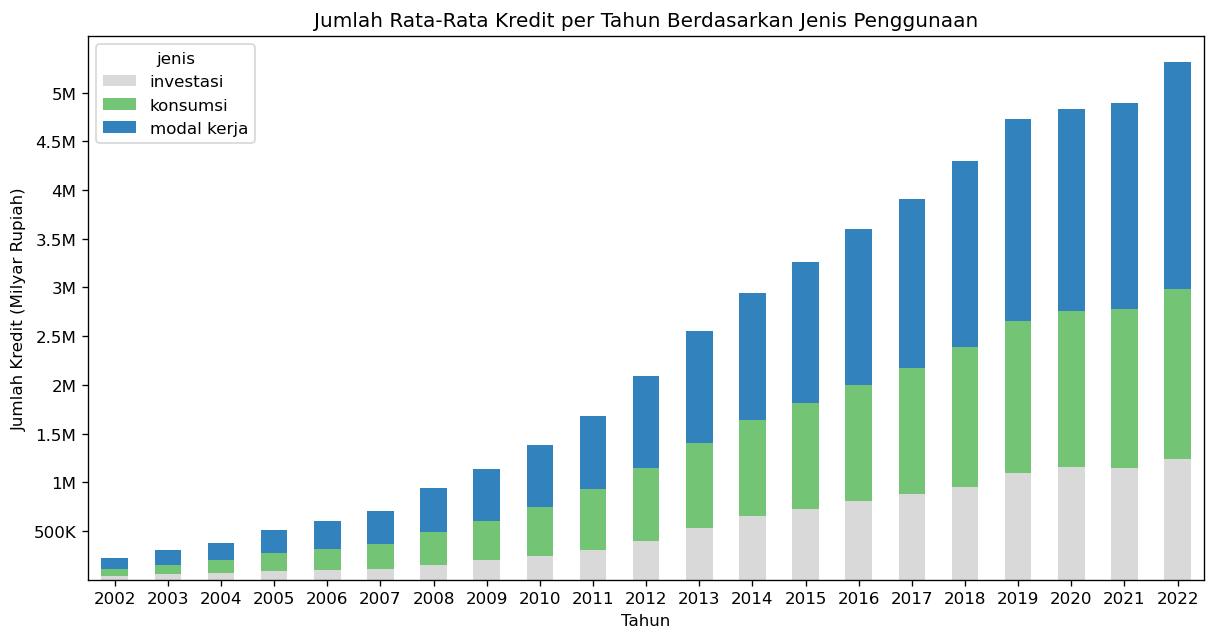

In [105]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 12, 6

k_k_tahun = k_k.groupby('tahun').sum()
k_i_tahun = k_i.groupby('tahun').sum()
k_mk_tahun = k_mk.groupby('tahun').sum()
k_k_tahun['jenis'] = ['konsumsi' for i in range(k_k_tahun.shape[0])]
k_i_tahun['jenis'] = ['investasi' for j in range(k_i_tahun.shape[0])]
k_mk_tahun['jenis'] = ['modal kerja' for k in range(k_mk_tahun.shape[0])]

k_jenis = pd.concat([k_k_tahun, k_i_tahun, k_mk_tahun]).reset_index()
k_pivot = k_jenis.pivot(index='tahun', columns='jenis', values='kredit').reset_index()

k_pivot.plot(
    x='tahun',
    kind='bar',
    stacked=True,
    colormap='tab20c_r'
)

x_ax = [0.5*i*(10**6) for i in range(1, 11)]

plt.title('Jumlah Rata-Rata Kredit per Tahun Berdasarkan Jenis Penggunaan')
plt.xticks(rotation=0)
plt.yticks(x_ax, [numerize.numerize(n) for n in x_ax])
plt.ylabel('Jumlah Kredit (Milyar Rupiah)')
plt.xlabel('Tahun')
plt.show()